# Example

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     121 non-null    int64  
 1   week           121 non-null    int64  
 2   month          121 non-null    int64  
 3   year           121 non-null    int64  
 4   date           121 non-null    object 
 5   total_revenue  121 non-null    float64
dtypes: float64(1), int64(4), object(1)
memory usage: 5.8+ KB


<Axes: xlabel='date'>

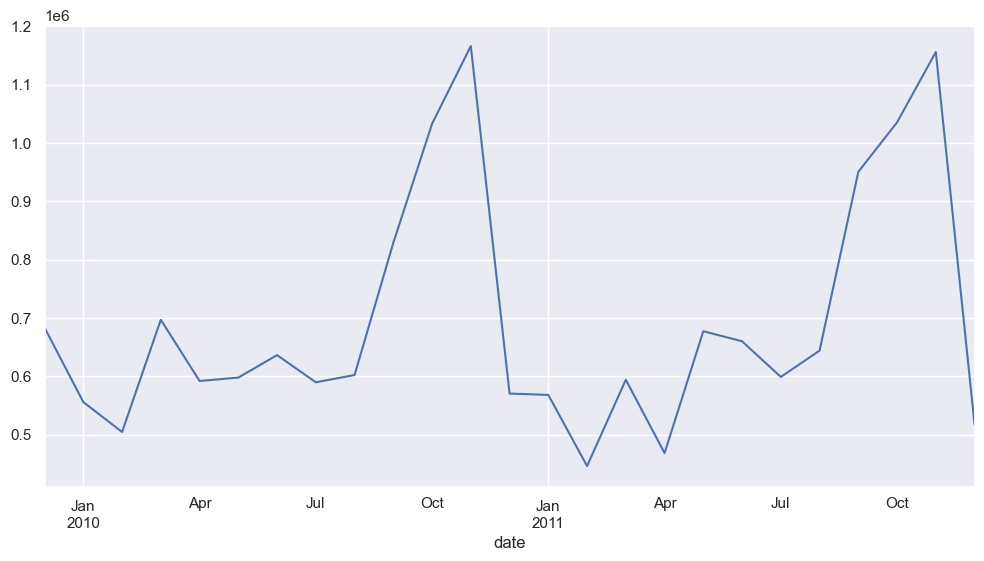

In [27]:
import warnings
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
time_series= pd.read_csv('timeseries.csv',parse_dates=True)
time_series.info()
time_series['date']= pd.to_datetime(time_series['date'])

time_series= time_series.set_index('date')
monthly_series= time_series.total_revenue.resample('M').sum()

monthly_series.plot()

In [7]:
from statsmodels.tsa import holtwinters
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt


In [8]:
model_expo1= holtwinters.ExponentialSmoothing(monthly_series,trend='add',
                                                     seasonal='add',seasonal_periods=12)
model_expo2= holtwinters.ExponentialSmoothing(monthly_series,trend='mul',
                                                     seasonal='add',seasonal_periods=12)
model_expo3= holtwinters.ExponentialSmoothing(monthly_series,trend='add',
                                                     seasonal='mul',seasonal_periods=12)

model_expo4= holtwinters.ExponentialSmoothing(monthly_series,trend='mul',
                                                     seasonal='mul',seasonal_periods=12)

ses= SimpleExpSmoothing(monthly_series, initialization_method="heuristic").fit(
    smoothing_level=0.2, optimized=False
)

holt= Holt(monthly_series, initialization_method="estimated").fit(
    smoothing_level=0.8, smoothing_trend=0.2, optimized=False
)

results_1= model_expo1.fit()
results_2= model_expo2.fit()
results_3= model_expo3.fit()
results_4= model_expo4.fit()

c:\Users\Jhonnatan\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\Jhonnatan\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\Jhonnatan\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\Jhonnatan\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [9]:
fit1= model_expo1.fit().predict(0,len(monthly_series))
fit2= model_expo2.fit().predict(0,len(monthly_series))
fit3= model_expo3.fit().predict(0,len(monthly_series))
fit4= model_expo4.fit().predict(0,len(monthly_series))
fit5= ses.predict(0,len(monthly_series))
fit6= holt.predict(0,len(monthly_series))


mae1= round(abs(monthly_series- fit1).mean())
mae2= round(abs(monthly_series- fit2).mean())
mae3= round(abs(monthly_series- fit3).mean())
mae4= round(abs(monthly_series- fit4).mean())
mae5= round(abs(monthly_series- fit5).mean())
mae6= round(abs(monthly_series- fit6).mean())


c:\Users\Jhonnatan\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\Jhonnatan\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\Jhonnatan\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\Jhonnatan\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [10]:
{'add_add':mae1,'mul_add':mae2,'add_mul':mae3,'mul_mul':mae4,'ses':mae5,'holt':mae6}


{'add_add': 36217,
 'mul_add': 36208,
 'add_mul': 37966,
 'mul_mul': 37961,
 'ses': 159180,
 'holt': 156639}

c:\Users\Jhonnatan\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


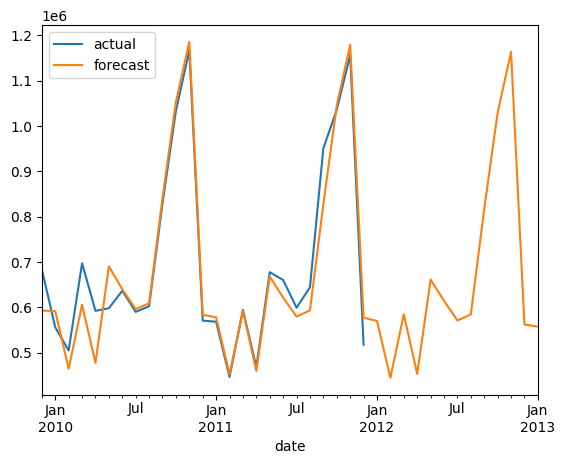

In [11]:
forecast=model_expo2.fit().predict(0,len(monthly_series)+12)

monthly_series.plot(label='actual')
forecast.plot(label='forecast')
plt.legend(loc='upper left')



In [13]:
ma_data= time_series[['total_revenue']]
ma_data['set']='train'
ma_data.loc['2011','set']='test'
# ma_data

C:\Users\Jhonnatan\AppData\Local\Temp\ipykernel_17288\1508475473.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ma_data['set']='train'


In [14]:
ma_data['rolling_5']= ma_data.total_revenue.shift().rolling(5).mean()
ma_data['rolling_3']= ma_data.total_revenue.shift().rolling(3).mean()

C:\Users\Jhonnatan\AppData\Local\Temp\ipykernel_17288\139581757.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ma_data['rolling_5']= ma_data.total_revenue.shift().rolling(5).mean()
C:\Users\Jhonnatan\AppData\Local\Temp\ipykernel_17288\139581757.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ma_data['rolling_3']= ma_data.total_revenue.shift().rolling(3).mean()


<Axes: xlabel='date'>

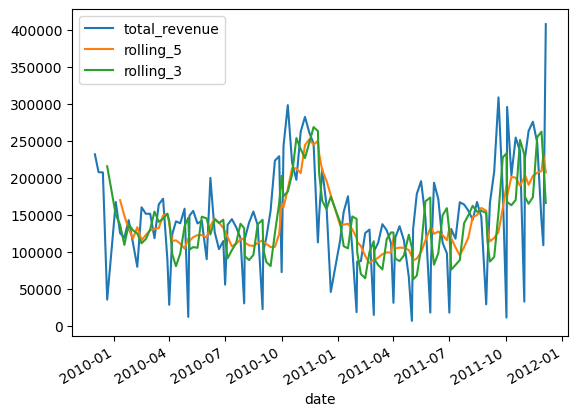

In [15]:
ma_data.plot()

In [16]:
test_set= ma_data[ma_data.set== 'test']

In [20]:
mae_r5=np.mean(abs(test_set.total_revenue- test_set.rolling_5))
mae_r3=np.mean(abs(test_set.total_revenue- test_set.rolling_3))
mse_r5=np.mean((test_set.total_revenue- test_set.rolling_5)**2)
mse_r3=np.mean((test_set.total_revenue- test_set.rolling_3)**2)
rmse_r5=np.sqrt(np.mean((test_set.total_revenue- test_set.rolling_5)**2))
rmse_r3=np.sqrt(np.mean((test_set.total_revenue- test_set.rolling_3)**2))

{'mae_r5':mae_r5,'mae_r3':mae_r3,'mse_r5':mse_r5,'mse_r3':mse_r3,'rmse_r5':rmse_r5,'rmse_r3':rmse_r3}

{'mae_r5': 57070.756691525494,
 'mae_r3': 69453.79201129956,
 'mse_r5': 5486058202.987315,
 'mse_r3': 7687142220.020161,
 'rmse_r5': 74067.92965236247,
 'rmse_r3': 87676.34926261564}

# Solution Proposed

Requirements:
- pip install sktime
- pip install lightgbm
- pip install pmdarima

In [72]:
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.compose import make_reduction
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from sktime.forecasting.arima import AutoARIMA
from sktime.utils.plotting import plot_series
import seaborn as sns
from sktime.forecasting.base import ForecastingHorizon

sns.set(rc={'figure.figsize':(12,6)})

from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.compose import make_reduction

#from lightgbm import LGBMRegressor
from sktime.forecasting.arima import AutoARIMA
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
from sktime.utils.plotting import plot_series
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.compose import make_reduction, TransformedTargetForecaster
from sktime.transformations.series.detrend import Deseasonalizer, Detrender
from sktime.forecasting.trend import PolynomialTrendForecaster
from sktime.forecasting.ets import AutoETS
import seaborn as sns
sns.set(rc={'figure.figsize':(12,6)})
#import xgboost as xgb
from lightgbm import LGBMRegressor
import pandas as pd
import datetime
from sktime.forecasting.compose import ForecastingPipeline
from sktime.forecasting.model_selection import (
 
    ForecastingGridSearchCV,
   ExpandingWindowSplitter,SlidingWindowSplitter)
from sktime.performance_metrics.forecasting import MeanAbsoluteError, MeanSquaredError
import numpy as np
from sktime.transformations.series.summarize import WindowSummarizer
from sktime.forecasting.model_evaluation import evaluate
from sktime.transformations.series.impute import Imputer
#import xgboost as xgb
#from xgboost import XGBClassifier


import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import seaborn as sns

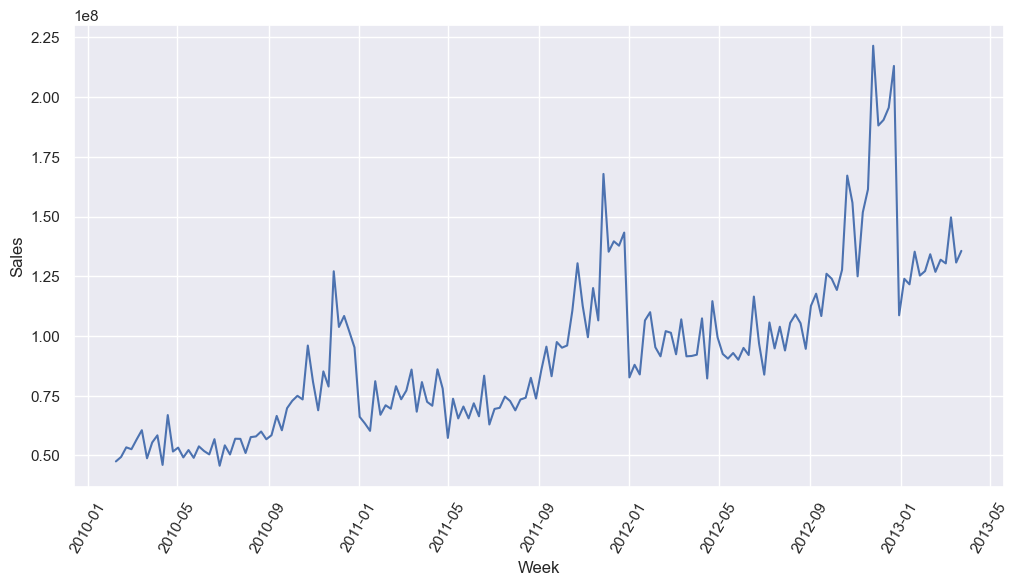

In [51]:
regression= pd.read_csv('regression.csv')
regression['Week']= pd.to_datetime(regression['Week'],format='%m/%d/%y')
regression['Sales']= regression['Sales'].str.replace(',','')
regression['Sales']= pd.to_numeric(regression['Sales'])

import matplotlib.pyplot as plt
sns.lineplot(x='Week',y='Sales',data=regression)
plt.xticks(rotation=60)
plt.show()

In [52]:
regression['trend']= range(regression.shape[0])
forecaster = AutoARIMA(sp=52)
regressor = LinearRegression()
forecaster1 = make_reduction(estimator=regressor, strategy='recursive', window_length=4)
lgb= LGBMRegressor()
forecaster2 = make_reduction(estimator=lgb, strategy='recursive', window_length=4)


In [53]:
""" # Define periods
regression['Week'] = pd.PeriodIndex(regression['Week'], freq='W').to_timestamp()
regression = regression.set_index('Week').to_period("W")
"""

regression['month']=regression['month'].astype('category')
regression=pd.get_dummies(regression)

In [110]:
""" AutoARIMA """
y= regression['Sales']
x=regression.loc[:,'Promos':]
y_train, y_test, X_train, X_test = temporal_train_test_split(y, x, test_size=30)
forecaster.fit(y_train)

c:\Users\Jhonnatan\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\Jhonnatan\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Jhonnatan\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\Jhonnatan\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few obse

AutoARIMA(sp=52)

In [112]:
""" Linear Regresion """
forecaster1.fit(y_train,X_train)

RecursiveTabularRegressionForecaster(estimator=LinearRegression(),
                                     window_length=4)

In [113]:
""" LGBMRegressor """
forecaster2.fit(y_train,X_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000379 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 479
[LightGBM] [Info] Number of data points in the train set: 130, number of used features: 12
[LightGBM] [Info] Start training from score 82440440.369231
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

RecursiveTabularRegressionForecaster(estimator=LGBMRegressor(), window_length=4)

In [114]:
fh_abs = ForecastingHorizon(y_test.index, is_relative=False) 
y_train.index
#y_test.head

Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
       124, 125, 126, 127, 128, 129, 130, 131, 132, 133],
      dtype='int64', length=134)

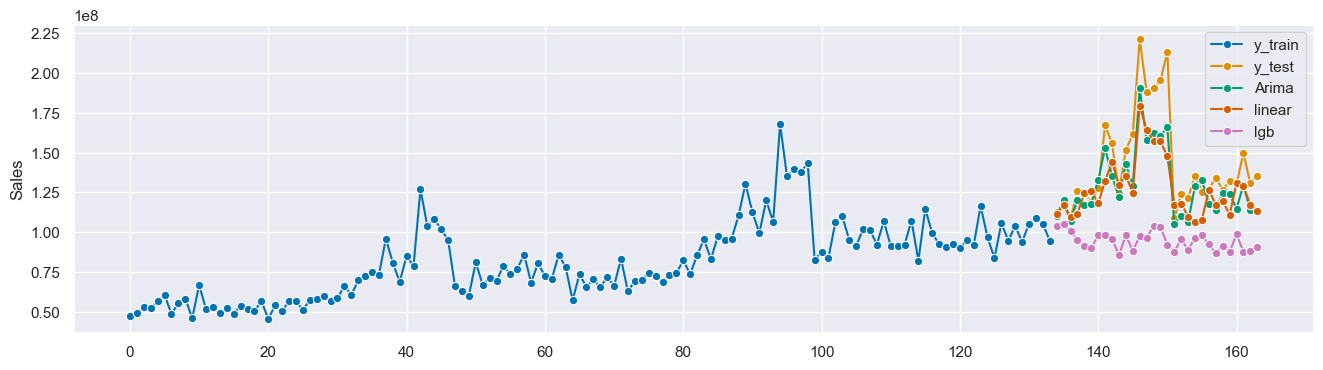

In [115]:
y_pred = forecaster.predict(X=X_test, fh=fh_abs)
y_pred1 = forecaster1.predict(X=X_test, fh=fh_abs)
y_pred2 = forecaster2.predict(X=X_test, fh=fh_abs)

plot_series(y_train, y_test, y_pred, y_pred1 ,y_pred2,labels=["y_train", "y_test", "Arima",'linear','lgb']);

In [116]:
test_set= y_test

In [120]:
# Predictions
y_pred = forecaster.predict(X=X_test, fh=fh_abs)
y_pred1 = forecaster1.predict(X=X_test, fh=fh_abs)
y_pred2 = forecaster2.predict(X=X_test, fh=fh_abs)

# Error Metrics Functions
def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculating Errors for each model
errors = {}
for model_name, prediction in zip(["Arima", "Linear", "LGB"], [y_pred, y_pred1, y_pred2]):
    errors[model_name] = {
        "MAE": mean_absolute_error(y_test, prediction),
        "MSE": mean_squared_error(y_test, prediction),
        "RMSE": np.sqrt(mean_squared_error(y_test, prediction)),
        "MAPE": calculate_mape(y_test, prediction)
    }

# DataFrame from the errors dictionary

errors_df = pd.DataFrame(errors).transpose()

# Applying red color scale
styled_df = errors_df.style.background_gradient(cmap='Reds')

# Display the styled DataFrame
styled_df


,MAE,MSE,RMSE,MAPE
Arima,14464584.832922,349006161589133.750000,18681706.602694,9.187538
Linear,17197633.430931,525185898483116.750000,22916934.753215,10.850135
LGB,48392630.076173,3211711666217434.000000,56671965.434573,31.475469


### Better Models
- Random Forests for Time Series
- AutoSARIMA
- Prophet
- Theta Method
- LSTM (Long Short-Term Memory) Networks

In [118]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [119]:
""" Random Forest for Time Series"""
# Custom function to calculate Mean Percentage Error (MOPE)
def mean_percentage_error(y_true, y_pred):
    return ((y_true - y_pred) / y_true).abs().mean() * 100

# Step 2: Load dataset
regression2 = pd.read_csv('regression.csv')
regression2['Week'] = pd.to_datetime(regression2['Week'], format='%m/%d/%y')
regression2['Sales'] = regression2['Sales'].str.replace(',', '')
regression2['Sales'] = pd.to_numeric(regression2['Sales'])

# Step 3: Feature engineering
regression2['trend'] = range(regression2.shape[0])
regression2['month'] = regression2['Week'].dt.month.astype('category')

# One-hot encode the 'month' column
regression2 = pd.get_dummies(regression2)

# Step 4: Train-test split
X = regression2.drop(columns=['Sales', 'Week'])  # Features
y = regression2['Sales']  # Target variable

X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train2, y_train2)

# Step 6: Evaluate the model
train_preds = rf_model.predict(X_train2)
test_preds = rf_model.predict(X_test2)

train_rmse = mean_squared_error(y_train2, train_preds, squared=False)
test_rmse = mean_squared_error(y_test2, test_preds, squared=False)

train_mae = mean_absolute_error(y_train2, train_preds)
test_mae = mean_absolute_error(y_test2, test_preds)

train_mope = mean_percentage_error(y_train2, train_preds)
test_mope = mean_percentage_error(y_test2, test_preds)

train_mse = mean_squared_error(y_train2, train_preds)
test_mse = mean_squared_error(y_test2, test_preds)

print("Test RMSE:", test_rmse)
print("Test MAE:", test_mae)
print("Test MAPE:", test_mope)
print("Test MSE:", test_mse)

# Step 7: Make predictions (if needed)
# You can use the trained model to make predictions on new data if available.


Test RMSE: 7558344.655490613
Test MAE: 5779205.516363636
Test MAPE: 6.4811243442058535
Test MSE: 57128573931183.51


c:\Users\Jhonnatan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Jhonnatan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [121]:
errors_df

,MAE,MSE,RMSE,MAPE
Arima,1.446458e+07,3.490062e+14,1.868171e+07,9.187538
Linear,1.719763e+07,5.251859e+14,2.291693e+07,10.850135
LGB,4.839263e+07,3.211712e+15,5.667197e+07,31.475469


In [124]:
# The errors dictionary with pre-existing models and their metrics
errors = {
    "Arima": {
        "MAE": 1.446458e+07,
        "MSE": 3.490062e+14,
        "RMSE": 1.868171e+07,
        "MAPE": 9.187538
    },
    "Linear": {
        "MAE": 1.719763e+07,
        "MSE": 5.251859e+14,
        "RMSE": 2.291693e+07,
        "MAPE": 10.850135
    },
    "LGB": {
        "MAE": 4.839263e+07,
        "MSE": 3.211712e+15,
        "RMSE": 5.667197e+07,
        "MAPE": 31.475469
    },
    # Adding Random Forest model's error metrics
    "Random Forest": {
        "MAE": 5779205.516363636,
        "MSE": 57128573931183.51,
        "RMSE": 7558344.655490613,
        "MAPE": 6.4811243442058535
    }
}

# Creating the DataFrame from the errors dictionary
errors_df = pd.DataFrame(errors).transpose()

# Applying red color scale
styled_df = errors_df.style.background_gradient(cmap='Reds')

# Display the styled DataFrame
styled_df

,MAE,MSE,RMSE,MAPE
Arima,14464580.000000,349006200000000.000000,18681710.000000,9.187538
Linear,17197630.000000,525185900000000.000000,22916930.000000,10.850135
LGB,48392630.000000,3211712000000000.000000,56671970.000000,31.475469
Random Forest,5779205.516364,57128573931183.507812,7558344.655491,6.481124
